In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
import scipy.optimize as scopt

plt.ion()
plt.rcParams['figure.figsize'] = 8, 6

In [9]:
# solve the system dy/dt = f(y, t)
def f(y, t, beta, gamma, birth, death):
    Si, Ii, Ri = tuple(y)
    # SIR model equations
    # n = S+I+R
    # dS/dt = -beta * S * I - (S/n)*death
    # dI/dt = beta * S * I - gamma * I - (I/n)*death
    # dR/dt = gamma * I - (R/n)*death
    n = Si+Ii+Ri
    f0 = -beta*Si*Ii - (Si/n)*death + n*birth
    f1 = beta*Si*Ii - gamma*Ii - (Ii/n)*death
    f2 = gamma*Ii - (Ri/n)*death
    return np.array([f0, f1, f2])

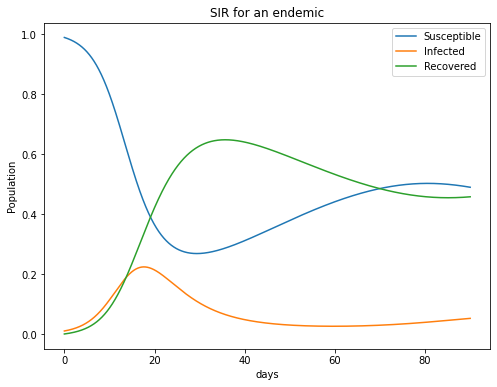

In [13]:
# initial conditions
I0 = 0.01     # initial number of infected people
S0 = 1.0 - I0  # initial number of susceptible people
R0 = 0.0        # initial number of recovered people
y0 = np.array([S0, I0, R0]) # initial condition vector

beta = 0.5 # rate of infection
gamma = 0.2  # rate of recovery
birth = 0.02 # natural birth rate
death = birth # natural death rate
assert birth == death # we want to keep the population size constant

days = 90
resolution = 1000
t  = np.linspace(0, days, days * resolution) # time grid

# solve the DEs
sol = scint.odeint(f, y0, t, args=(beta, gamma, birth, death))
S = sol[:, 0]
I = sol[:, 1]
R = sol[:, 2]
assert np.allclose(sol.sum(axis=1), 1.)

# plot results
plt.figure()
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('days')
plt.ylabel('Population')
plt.title('SIR for an endemic')
plt.legend(loc=0)
plt.show()

beta, gamma guess 1.5541063404737374 0.41776911145202683
[1.55410634 0.41776911] [[0.00053253 0.00012577]
 [0.00012577 0.00019908]]
beta, gamma 1.5541063404737374 0.41776911145202683


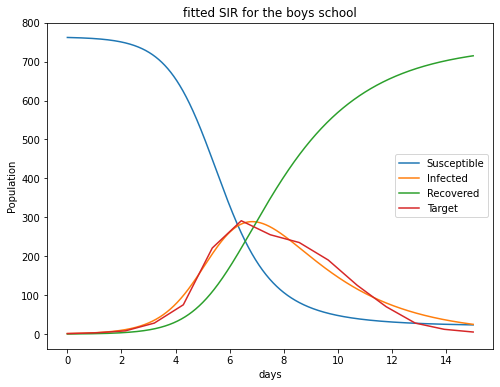

In [168]:
import scipy.fft